In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('../Data/Cleaned/Algerian_forest_fires_dataset_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        244 non-null    int64  
 1   Temperature  244 non-null    int64  
 2   RH           244 non-null    int64  
 3   Ws           244 non-null    int64  
 4   Rain         244 non-null    float64
 5   FFMC         244 non-null    float64
 6   DMC          244 non-null    float64
 7   DC           244 non-null    float64
 8   ISI          244 non-null    float64
 9   BUI          244 non-null    float64
 10  FWI          244 non-null    float64
 11  Classes      244 non-null    int64  
 12  Region       244 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 24.9 KB


In [49]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [50]:
df.head(3)

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0


In [51]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [52]:
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=404)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 12), (61, 12), (183,), (61,))

# Feature Selection

In [55]:
corr = X_train.corr()
corr

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
month,1.000000,-0.018379,-0.122534,-0.064110,-0.024564,0.109286,0.120104,0.170474,0.107191,0.136674,0.014392,0.007858
Temperature,-0.018379,1.000000,-0.636274,-0.263049,-0.271448,0.650906,0.466380,0.345953,0.577147,0.439163,0.495718,0.290424
RH,-0.122534,-0.636274,1.000000,0.226164,0.213981,-0.650743,-0.423221,-0.229233,-0.686437,-0.366833,-0.434992,-0.444391
Ws,-0.064110,-0.263049,0.226164,1.000000,0.240853,-0.131065,-0.016037,0.094206,0.019397,0.026507,-0.050628,-0.230389
Rain,-0.024564,-0.271448,0.213981,0.240853,1.000000,-0.499260,-0.260350,-0.290349,-0.324833,-0.279081,-0.355406,-0.049097
FFMC,0.109286,0.650906,-0.650743,-0.131065,-0.499260,1.000000,0.585146,0.498180,0.731830,0.581542,0.760194,0.204026
DMC,0.120104,0.466380,-0.423221,-0.016037,-0.260350,0.585146,1.000000,0.864567,0.667187,0.980411,0.557147,0.228729
DC,0.170474,0.345953,-0.229233,0.094206,-0.290349,0.498180,0.864567,1.000000,0.500945,0.934299,0.503938,-0.041721
ISI,0.107191,0.577147,-0.686437,0.019397,-0.324833,0.731830,0.667187,0.500945,1.000000,0.637308,0.717358,0.249309
BUI,0.136674,0.439163,-0.366833,0.026507,-0.279081,0.581542,0.980411,0.934299,0.637308,1.000000,0.571771,0.126672


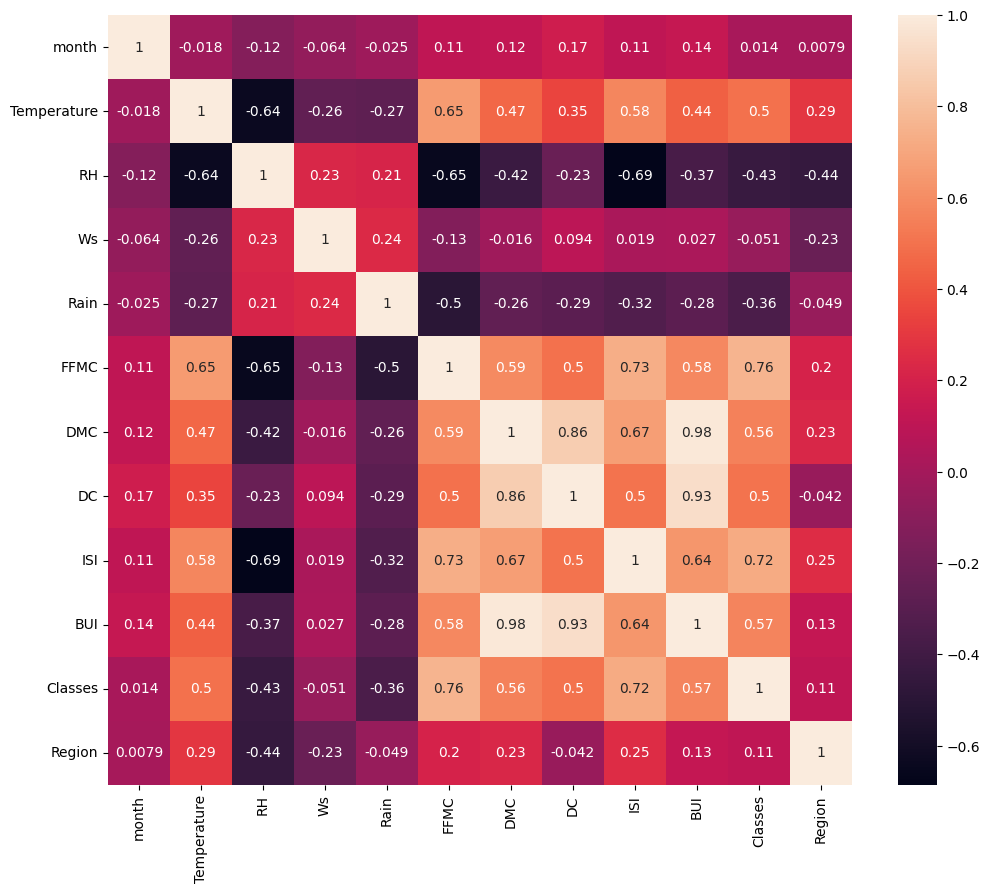

In [56]:
# Check for colliearity
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [57]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [58]:
#threshold - normal threshold is setup by a domain expert
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [59]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [60]:
X_train.shape, X_test.shape

((183, 10), (61, 10))

# Feature Scaling and Stadardisation

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

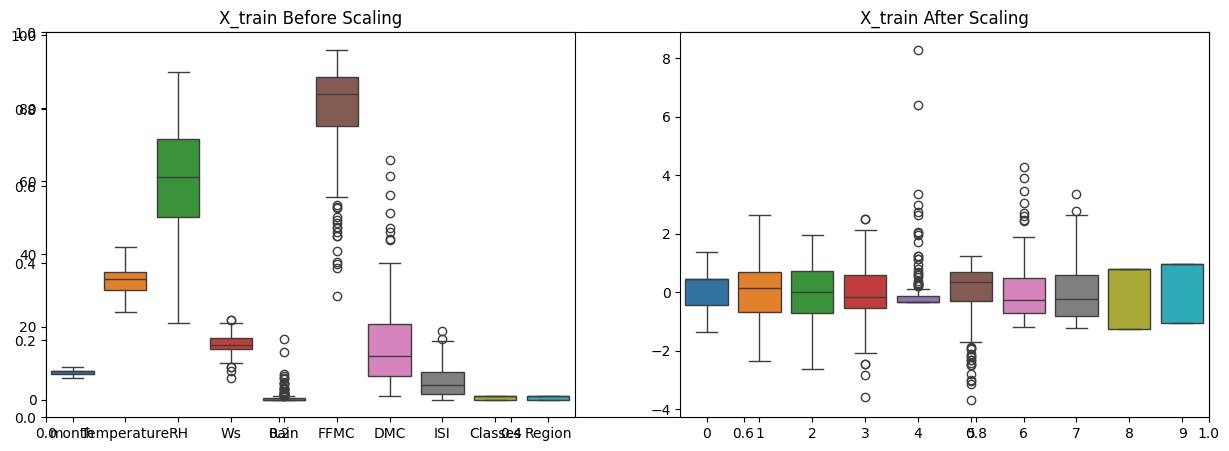

In [65]:
# Boxplots to understand effect of standard scaling

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

# Training Model
## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [67]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
y_pred = linreg.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae, mse, r2)

0.6060193188897424 0.7558734440344093 0.9869892863019255


## Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [72]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [73]:
y_pred_lasso = lasso.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(mae, mse, r2)

1.1173453530993291 2.539797095463978 0.9562829292111252


## Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [77]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [86]:
y_pred_ridge = ridge.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(mae, mse, r2)

0.6093111895020967 0.7700145883528704 0.9867458773271259


## ElasticNet

In [88]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

In [81]:
elasticnet.fit(X_train_scaled, y_train)

ElasticNet()

In [82]:
y_pred_elasticnet = elasticnet.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred_elasticnet)
mse = mean_squared_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred_elasticnet)

print(mae, mse, r2)

1.6566068605715174 5.609233336986799 0.9034492750218809


## 